# 이미지 수집

In [11]:
!git clone https://github.com/ndb796/bing_image_downloader

fatal: destination path 'bing_image_downloader' already exists and is not an empty directory.


In [1]:
import os
import shutil
from bing_image_downloader.bing_image_downloader import downloader

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 생성 -> 이동 -> 삭제(수업 version)

# directory_list = [
#         './dataset/train/',
#         './dataset/test/',
#     ]

# downloader.download(query='카피바라', limit=50, output_dir='./',adult_filter_off=True,force_replace=False,timeout=60)

# def dataset_split(query, train_cnt):   
#     for dir in directory_list:  
#         if not os.path.isdir(dir+query):
#             os.makedirs(dir+query)

#     cnt = 0

#     for file_name in os.listdir(query):
#         if cnt < train_cnt:
#             shutil.move(query+"/"+file_name, './dataset/train/'+query+'/'+file_name )
#         else:
#             shutil.move(query+"/"+file_name, './dataset/test/'+query+'/'+file_name )
        
#         cnt += 1

#     shutil.rmtree(query)

# dataset_split('카피바라',40)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (https://cdn.pixabay.com/photo/2022/07/01/13/07/capybara-7295601_1280.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://cdn.pixabay.com/photo/2022/10/25/05/56/capybaras-7544912_1280.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://png.pngtree.com/background/20230424/original/pngtree-brown-capybara-wating-for-water-in-the-jungle-picture-image_2456049.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://cdn.pixabay.com/photo/2022/04/25/06/39/capybaras-7155224_1280.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://cdn.pixabay.com/photo/2016/10/11/16/13/capybara-1732019_960_720.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://img1.yna.co.kr/photo/yna/YH/2022/12/28/PYH2022122814730006100_P4.jpg)
[Info] Issue getting: https://img1.yna.co.kr/photo/yna/YH/2022/12/28/PYH2022122814730006100_P4.jpg
[Error] <urlopen error [SSL: UNSAFE_LEGACY_RENEGOTIATION_DISABLED] unsafe legacy renegotiation disabled (_ssl.c:1016)>
#6 이미지 다운로드 (https://png.p

In [ ]:
# 생성과 분리 한번에 하는 함수

def dataset_download_split(query_input, total_count, train_rate):   
        
    # jpg, jpeg, png만 가능하도록 처리해야 함(webp 주의)    
    downloader.download(query=query_input, limit=total_count, output_dir='./', 
                        adult_filter_off=True, force_replace=False, timeout=60)
    
    directory_dict = {
        'train' : './dataset/train/',
        'test' : './dataset/test/',
    }
    
    for dir in directory_list:  
        if not os.path.isdir(dir + query_input):
            os.makedirs(dir + query_input)

    train_cnt = int(total_count * train_rate)
    cnt = 0

    for file_name in os.listdir(query_input):
        if cnt < train_cnt:
            shutil.move(query_input + "/" + file_name, directory_dict['train'] + query_input+'/' + file_name )
        else:
            shutil.move(query_input + "/" + file_name, directory_dict['test'] + query_input + '/' + file_name )
        
        cnt += 1

    shutil.rmtree(query_input)

In [40]:
dataset_download_split(query_input = '마동석', total_count = 50, train_rate = 0.8)
dataset_download_split(query_input = '카리나', total_count = 50, train_rate = 0.8)
dataset_download_split(query_input = '이수지', total_count = 50, train_rate = 0.8)

[Info] Indexing page: 1
[Info] Indexed 35 Images on Page 1.
#1 이미지 다운로드 (http://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2019/05/14/5tjArQ2TYQ7Y636934517816837543.jpg)
#1 파일 다운로드가 완료되었습니다.
#2 이미지 다운로드 (https://entertainimg.kbsmedia.co.kr/cms/uploads/PERSON_20240206075441_1b54f931528a9d36c98db236a5e19d74.jpg)
#2 파일 다운로드가 완료되었습니다.
#3 이미지 다운로드 (https://img.tvreportcdn.de/cms-content/uploads/2023/05/22/5d7cd409-b0ed-438a-a65a-95fc262864d6.jpg)
#3 파일 다운로드가 완료되었습니다.
#4 이미지 다운로드 (https://newsimg.sedaily.com/2023/05/22/29POFIOI4D_1.jpg)
#4 파일 다운로드가 완료되었습니다.
#5 이미지 다운로드 (https://talkimg.imbc.com/TVianUpload/tvian/TViews/image/2023/05/29/634edfdc-1b35-4ce1-90e8-fd03fc9cf00d.jpg)
#5 파일 다운로드가 완료되었습니다.
#6 이미지 다운로드 (https://img.etnews.com/news/article/2023/06/05/news-p.v1.20230605.9f5212ecfaf34a79865d1145b6828b8a_P1.jpg)
#6 파일 다운로드가 완료되었습니다.
#7 이미지 다운로드 (https://img.hankyung.com/photo/201709/01.14677695.1.jpg)
#7 파일 다운로드가 완료되었습니다.
#8 이미지 다운로드 (https://image.xportsnews.com/contents/images/uplo

In [7]:
transforms_train = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) 
    ]
)

transforms_test = transforms.Compose(
    [
        transforms.Resize((224,224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]
)


# torch가 자동으로 mapping(label 값을 생성)
# datasets
#   -train
#   -test
train_datasets = datasets.ImageFolder(root='./dataset/train', transform=transforms_train)
test_datasets = datasets.ImageFolder(root='./dataset/test', transform=transforms_test)

In [8]:
print(train_datasets)
train_datasets.classes

Dataset ImageFolder
    Number of datapoints: 120
    Root location: ./dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


['마동석', '이수지', '카리나']

In [9]:
train_dataloader = torch.utils.data.DataLoader(train_datasets, batch_size=4, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_datasets, batch_size=4, shuffle=False)

In [10]:
next(iter(train_dataloader))

[tensor([[[[-1.2788, -1.2959, -1.2959,  ..., -1.7412, -1.7925, -1.9467],
           [-1.3302, -1.3130, -1.2788,  ..., -1.7412, -1.7925, -1.9467],
           [-1.4329, -1.4329, -1.3815,  ..., -1.7240, -1.7925, -1.9467],
           ...,
           [-2.1008, -2.1008, -2.0837,  ..., -1.9467, -1.9809, -2.0323],
           [-2.0837, -2.0837, -2.0837,  ..., -1.9467, -1.9980, -2.0494],
           [-2.0837, -2.0837, -2.0837,  ..., -1.9638, -2.0152, -2.0494]],
 
          [[-0.9853, -0.9853, -0.9853,  ..., -1.3529, -1.4580, -1.6856],
           [-1.0378, -1.0203, -0.9853,  ..., -1.3354, -1.4405, -1.6856],
           [-1.1604, -1.1604, -1.1078,  ..., -1.3354, -1.4405, -1.6856],
           ...,
           [-2.0007, -2.0007, -2.0007,  ..., -1.6856, -1.7731, -1.8957],
           [-2.0007, -2.0007, -1.9832,  ..., -1.7031, -1.8256, -1.9132],
           [-2.0007, -2.0007, -1.9832,  ..., -1.7381, -1.8431, -1.9482]],
 
          [[-0.5147, -0.5321, -0.5321,  ..., -0.8110, -0.9504, -1.2641],
           [-

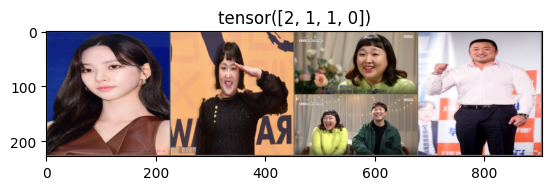

In [15]:
def imshow(img, title):
    
    img = img.numpy().transpose([1,2,0])
    
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    img = std * img + mean
    img = np.clip(img, 0, 1)
    
    plt.imshow(img)
    plt.title(title)
    plt.show()
    
images, labels = next(iter(train_dataloader))    
images_data = torchvision.utils.make_grid(images)

imshow(images_data, labels) # test할때 활용(배치 단위로 묶어서 화면 출력)